In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
import string

In [2]:
data = pd.read_excel('hotel_reviews.xlsx')
data.head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


In [3]:
data.shape

(20491, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [9]:
data['Rating']=data['Rating'].astype('int')

<Axes: xlabel='Rating', ylabel='count'>

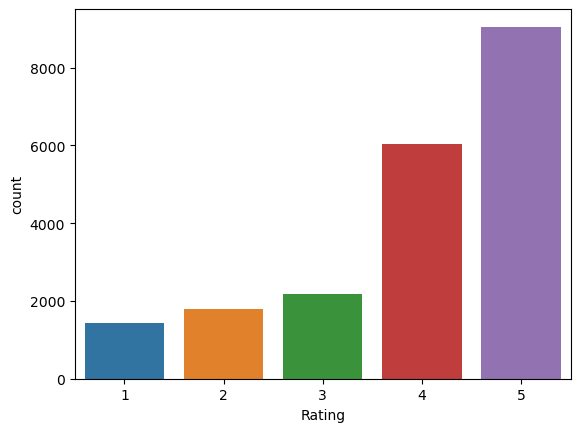

In [10]:
sns.countplot(data = data , x = 'Rating')

C:\Users\anvesh\AppData\Local\Temp\ipykernel_8000\3668244061.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['Review'].apply(len), y=data['Rating'], data=data, palette='crest')


<Axes: xlabel='Review', ylabel='Rating'>

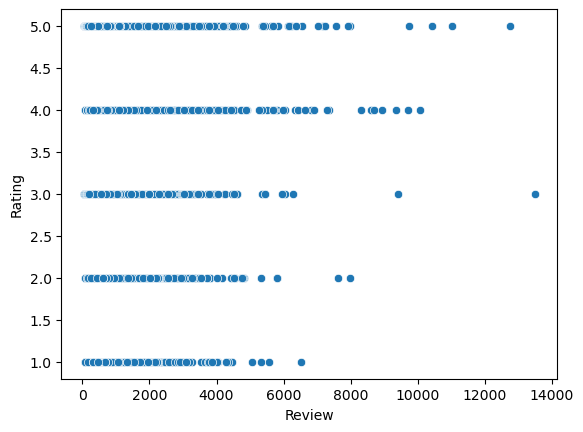

In [11]:
sns.scatterplot(x=data['Review'].apply(len), y=data['Rating'], data=data, palette='crest')

In [12]:
data1 = data.copy()

In [13]:
data1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anvesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anvesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anvesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anvesh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
stop_words = nltk.corpus.stopwords.words('english')
stpw = ENGLISH_STOP_WORDS
wnl = WordNetLemmatizer()

In [19]:
def clean_text(text):
    
    text = re.sub(r'\w*\d\w*', '', str(text)).strip() #Removing numeric attached with words and return only alpha 
    
    text = re.sub("[\d]+", "", str(text))  # Removing the strings which contains unnecessary digits in data
    
    text = re.sub(r"won\'t", "will not", str(text))      # Replace contraction words
    text = re.sub(r"can\'t", "can not", str(text))      # Replace contraction words
    text = re.sub(r"ca n\'t", "can not", str(text))      # Replace contraction words
    text = re.sub(r"wo n\'t", "will not", str(text))      # Replace contraction words
    text = re.sub(r"\'t've", " not have", str(text))     # Replace contraction words
    text = re.sub(r"\'d've", " would have", str(text))   # Replace contraction words
    text = re.sub(r"\'cause", " because", str(text))     # Replace contraction words
    
    text = re.sub(r"n\'t", " not", str(text))     # Replace contraction words
    text = re.sub(r"\'re", " are", str(text))     # Replace contraction words
    text = re.sub(r"\'s", " is", str(text))       # Replace contraction words
    text = re.sub(r"\'d", " would", str(text))    # Replace contraction words
    text = re.sub(r"\'ll", " will", str(text))    # Replace contraction words
    text = re.sub(r"\'t", " not", str(text))      # Replace contraction words
    text = re.sub(r"\'ve", " have", str(text))    # Replace contraction words
    text = re.sub(r"\'m", " am", str(text))       # Replace contraction words
    text = re.sub(r"n\'t", " not", str(text))     # Replace contraction words
    text = re.sub(r"\'re", " are", str(text))     # Replace contraction words
    text = re.sub(r"\'s", " is", str(text))       # Replace contraction words
    text = re.sub(r"\'d", " would", str(text))    # Replace contraction words
    text = re.sub(r"\'ll", " will", str(text))    # Replace contraction words
    text = re.sub(r"\'t", " not", str(text))      # Replace contraction words
    text = re.sub(r"\'ve", " have", str(text))    # Replace contraction words
    text = re.sub(r"\'m", " am", str(text))       # Replace contraction words
    
    text = re.sub(r'[^\w\s]', " ", str(text))    # Removing white spaces and returning only alpha characters
    
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuations
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text)) # Remove Punctuations
    
    text = ' '.join( [w for w in text.split() if len(w)>1] ) # Removing an unnecessary single character from sentences
    
    text = text.split() #Splitting each word
    
    text = " ".join([word for word in text if word.lower().strip() not in stop_words]) #Removing stopwords, white spaces, making words lower and joining into text
    
    text = text.split() # Splitting each word
    
    text = " ".join([word for word in text if word not in stpw]) # Removing extra stopwords if any
    
    text = nltk.word_tokenize(text)  # Tokenising each words 
    text = " ".join([wnl.lemmatize(w, 'v') for w in text])  # Applying Lemmatization

    text = ' '.join(dict.fromkeys(text.split())) #Remove duplicate words from a sentence
    
    return text

In [25]:
clean_text(data1['Review'][2])

'nice room experience hotel monaco seattle good level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeep staffnegatives ac unit malfunction stay desk disorganize miss separate wakeup call concierge busy hard touch provide guidance special request tv use ipod sound dock non function decide book night weekend choice rest party fill comparison spend larger square footage great soak tub whirlpool jet shower arrange car service price tip reasonable driver wait arrival checkin easy downside pick person jacuzi bath accessories salt bubble get check voucher bottle champagne gesture fish impression huge open space felt big far away chore change channel break disappoint morning way ask thermostat say degrees warm try cover face bright blue light keep drop maintainence come look tell play settings happy digital box work happen later nap forget yep facilities surprise sell amenities relax water go'

In [20]:
data1['Fully_Clean_Text'] = data1['Review'].apply(lambda x: clean_text(x))
data1

,Review,Rating,Fully_Clean_Text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best keep secret time stay charm star beat inc...
20487,great location price view hotel great quick pl...,4,great location price view hotel quick place si...
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacation open sept guests wee...


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anvesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
def fetch_sentiment_using_SIA(text):
    sia = SentimentIntensityAnalyzer()
    polarity_scores = sia.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [23]:
data1['SIA_Vader'] = data1.Fully_Clean_Text.apply(lambda x: fetch_sentiment_using_SIA(x))

In [24]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [25]:
from textblob import TextBlob
from wordcloud import WordCloud
data1['TxtB_Polarity'] = data1['Fully_Clean_Text'].apply(lambda x: TextBlob(x).sentiment[0])

In [26]:
data1['TxtB_Polarity'].head(2)

0    0.157805
1    0.184212
Name: TxtB_Polarity, dtype: float64

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install afinn

In [29]:
from afinn import Afinn

In [30]:
afn = Afinn()
data1['Afinn_score'] = data1['Fully_Clean_Text'].apply(lambda x: afn.score(x))

In [31]:
def condition(x):
    if x>=20:
        return "Pos"
    else:
        return 'Neg'

In [32]:
data1['Affin_Sent'] = data1['Afinn_score'].apply(condition)

In [33]:
data1.head(2)

,Review,Rating,Fully_Clean_Text,SIA_Vader,TxtB_Polarity,Afinn_score,Affin_Sent
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...,pos,0.157805,14.0,Neg
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,pos,0.184212,29.0,Pos


In [34]:
data1['Target'] = data1['Rating'].apply(lambda x: 1 if x > 3 else 0)

In [35]:

vectorizer = TfidfVectorizer()

In [36]:
X = data1['Fully_Clean_Text']
y = data1['Target']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=True, stratify=y)

In [38]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB

In [40]:
lr_mod  = LogisticRegression()
nb_mod  = MultinomialNB()

In [41]:
lr_mod.fit(X_train, y_train)
nb_mod.fit(X_train, y_train)

MultinomialNB()

In [43]:
y_pred_lr  = lr_mod.predict(X_test)
y_pred_nb = nb_mod.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
cc  = [y_pred_lr, y_pred_nb]
mod = ['Logistic Regression', 'Naive Bayes']

print('Classification Report for all models','\n')

for i,j in zip(cc, mod):
    print('========================================================')
    print(j,'\n\n' , classification_report(y_test, i))

Classification Report for all models 

Logistic Regression 

               precision    recall  f1-score   support

           0       0.88      0.68      0.77      1620
           1       0.90      0.97      0.93      4528

    accuracy                           0.89      6148
   macro avg       0.89      0.83      0.85      6148
weighted avg       0.89      0.89      0.89      6148

Naive Bayes 

               precision    recall  f1-score   support

           0       1.00      0.08      0.15      1620
           1       0.75      1.00      0.86      4528

    accuracy                           0.76      6148
   macro avg       0.88      0.54      0.50      6148
weighted avg       0.82      0.76      0.67      6148



In [45]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
X = vectorizer.fit_transform(X)
y = y
sm = SMOTE(random_state=0)

In [46]:
X_res, y_res = sm.fit_resample(X, y)

In [47]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state=0, test_size=0.35, stratify=y_res)

In [48]:
lr_mod2  =LogisticRegression(random_state=0, max_iter=1000)
nb_mod2  = MultinomialNB()

In [49]:
lr_mod2.fit(X_train_res, y_train_res)
nb_mod2.fit(X_train_res, y_train_res)

MultinomialNB()

In [50]:
y_pred_lr2  = lr_mod2.predict(X_test_res)
y_pred_nb2  = nb_mod2.predict(X_test_res)

In [51]:
cc = [y_pred_lr2, y_pred_nb2]
mm = ['Logistic Regression', 'Naive Bayes']

for i,j in zip(cc, mm):
    print('======================================================')
    print(j, '\n', classification_report(y_test_res, i))
    print('======================================================', '\n')

Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      5283
           1       0.92      0.90      0.91      5283

    accuracy                           0.91     10566
   macro avg       0.91      0.91      0.91     10566
weighted avg       0.91      0.91      0.91     10566


Naive Bayes 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      5283
           1       0.90      0.85      0.88      5283

    accuracy                           0.88     10566
   macro avg       0.88      0.88      0.88     10566
weighted avg       0.88      0.88      0.88     10566


